<a href="https://colab.research.google.com/github/nayoung718/essa_python_1/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C_ch4_8~9_pg_252~277_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**파이썬 머신러닝 완벽가이드 ch4. 8 ~ 9 pg. 252 ~ 277 필사**

## 8. 분류 실습 - 캐글 산탄데르 고객 만족 예측

-XGBoost와 LightGBM 활용

-370개의 피처, 피처이름은 익명처리돼 이름으로는 속성 추정 불가, 클래스 레이블 명은 TARGET이며, 1이면 불만, 0이면 만족한 고객

-모델 성능 평가: ROC-AUC

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv("/train.csv",encoding='latin-1')
print('dataset shape: ',cust_df.shape)
cust_df.head(3)

dataset shape:  (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [15]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [16]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt=cust_df[cust_df['TARGET']==1].TARGET.count()
total_cnt=cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt/total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [17]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [18]:
## var3의 -999999 값 => 116개 은 결측값 혹은 이상치에 해당함
## 해당 값을 가장 값이 많은 값으로 바꾸기 위해 가장 많은 값 알아보면 다음과 같이 2가 나옴
cust_df['var3'].value_counts()

 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 231           1
 188           1
 168           1
 135           1
 87            1
Name: var3, Length: 208, dtype: int64

In [19]:
## -999999 => 2
cust_df['var3'].replace(-99999, 2, inplace=True)

## ID 열은 단순 식별자에 해당하므로 드롭
cust_df.drop('ID', axis=1, inplace=True)

## feature과 class 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처데이터 shape:{0}'.format(X_features.shape))

피처데이터 shape:(76020, 369)


In [20]:
from sklearn.model_selection import train_test_split

## train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0)

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 shape: {0}, 테스트 세트 shape: {1}'.format(X_train.shape,X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n테스트 데이터 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

# 학습 데이터와 테스트 데이터 세트 모두 불만족 비율이 4%

학습 세트 shape: (60816, 369), 테스트 세트 shape: (15204, 369)
학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

테스트 데이터 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [22]:
# XGBoost 모델 학습과 하이퍼 파라미터 튜닝
# 학습 모델 생성 후 예측 결과 ROC AUC로 평가

from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

#n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정
xgb_clf = XGBClassifier(n_estimator=500, random_state=156)

#성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.83789	validation_1-auc:0.82554


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:10:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[1]	validation_0-auc:0.84273	validation_1-auc:0.82878
[2]	validation_0-auc:0.84901	validation_1-auc:0.83359
[3]	validation_0-auc:0.85530	validation_1-auc:0.83767
[4]	validation_0-auc:0.85891	validation_1-auc:0.83909
[5]	validation_0-auc:0.86117	validation_1-auc:0.84156
[6]	validation_0-auc:0.86378	validation_1-auc:0.84138
[7]	validation_0-auc:0.86737	validation_1-auc:0.84048
[8]	validation_0-auc:0.87021	validation_1-auc:0.84162
[9]	validation_0-auc:0.87258	validation_1-auc:0.84100
[10]	validation_0-auc:0.87505	validation_1-auc:0.84117
[11]	validation_0-auc:0.87747	validation_1-auc:0.84111
[12]	validation_0-auc:0.87873	validation_1-auc:0.84121
[13]	validation_0-auc:0.88081	validation_1-auc:0.84075
[14]	validation_0-auc:0.88204	validation_1-auc:0.84024
[15]	validation_0-auc:0.88332	validation_1-auc:0.83974
[16]	validation_0-auc:0.88549	validation_1-auc:0.83951
[17]	validation_0-auc:0.88666	validation_1-auc:0.84003
[18]	validation_0-auc:0.88887	validation_1-auc:0.83990
[19]	validation_0-a

In [25]:
# XGBoost의 하이퍼 파라키터 튜닝 -> 칼럼 수 많으므로 과적합 가능성 가정후 max_depth, min_child_weight, colsample_bytree 하이퍼 파라미터만 일차 튜닝

from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기위해 100으로 감소
xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth': [5, 7], 'min_child_weight': [1, 3], 'colsample_bytree': [0.5, 0.75]}

#cv는 3으로 지정
gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터: ',gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.80705	validation_1-auc:0.80366
[1]	validation_0-auc:0.80607	validation_1-auc:0.80683
[2]	validation_0-auc:0.79962	validation_1-auc:0.80156
[3]	validation_0-auc:0.80429	validation_1-auc:0.80803
[4]	validation_0-auc:0.82980	validation_1-auc:0.82568
[5]	validation_0-auc:0.83992	validation_1-auc:0.83121
[6]	validation_0-auc:0.84630	validation_1-auc:0.83553
[7]	validation_0-auc:0.84627	validation_1-auc:0.83343
[8]	validation_0-auc:0.85016	validation_1-auc:0.83552
[9]	validation_0-auc:0.85079	validation_1-auc:0.83450
[10]	validation_0-auc:0.85224	validation_1-auc:0.83388
[11]	validation_0-auc:0.85542	validation_1-auc:0.83755
[12]	validation_0-auc:0.85740	validation_1-auc:0.83903
[13]	validation_0-auc:0.85943	validation_1-auc:0.83858
[14]	validation_0-auc:0.86030	validation_1-auc:0.83786
[15]	validation_0-auc:0.86089	validation_1-auc:0.83824
[16]	validation_0-auc:0.86217	validation_1-auc:0.83789
[17]	validation_0-auc:0.86282	validation_1-auc:0.83789
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81228	validation_1-auc:0.81007
[1]	validation_0-auc:0.81372	validation_1-auc:0.81399
[2]	validation_0-auc:0.81224	validation_1-auc:0.81337
[3]	validation_0-auc:0.80969	validation_1-auc:0.81042
[4]	validation_0-auc:0.83233	validation_1-auc:0.82795
[5]	validation_0-auc:0.84134	validation_1-auc:0.83396
[6]	validation_0-auc:0.84647	validation_1-auc:0.83741
[7]	validation_0-auc:0.84709	validation_1-auc:0.83382
[8]	validation_0-auc:0.85138	validation_1-auc:0.83695
[9]	validation_0-auc:0.85288	validation_1-auc:0.83754
[10]	validation_0-auc:0.85382	validation_1-auc:0.83662
[11]	validation_0-auc:0.85712	validation_1-auc:0.83727
[12]	validation_0-auc:0.85973	validation_1-auc:0.83969
[13]	validation_0-auc:0.86116	validation_1-auc:0.83962
[14]	validation_0-auc:0.86171	validation_1-auc:0.83988
[15]	validation_0-auc:0.86213	validation_1-auc:0.84055
[16]	validation_0-auc:0.86356	validation_1-auc:0.84057
[17]	validation_0-auc:0.86454	validation_1-auc:0.84037
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81466	validation_1-auc:0.81285
[1]	validation_0-auc:0.81725	validation_1-auc:0.81316
[2]	validation_0-auc:0.81285	validation_1-auc:0.81249
[3]	validation_0-auc:0.81026	validation_1-auc:0.80728
[4]	validation_0-auc:0.83250	validation_1-auc:0.82776
[5]	validation_0-auc:0.84146	validation_1-auc:0.83464
[6]	validation_0-auc:0.84638	validation_1-auc:0.83710
[7]	validation_0-auc:0.84626	validation_1-auc:0.83706
[8]	validation_0-auc:0.84956	validation_1-auc:0.83959
[9]	validation_0-auc:0.85123	validation_1-auc:0.83785
[10]	validation_0-auc:0.85238	validation_1-auc:0.83855
[11]	validation_0-auc:0.85550	validation_1-auc:0.84113
[12]	validation_0-auc:0.85812	validation_1-auc:0.84284
[13]	validation_0-auc:0.85982	validation_1-auc:0.84394
[14]	validation_0-auc:0.86123	validation_1-auc:0.84418
[15]	validation_0-auc:0.86146	validation_1-auc:0.84381
[16]	validation_0-auc:0.86247	validation_1-auc:0.84414
[17]	validation_0-auc:0.86329	validation_1-auc:0.84501
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.80747	validation_1-auc:0.80466
[1]	validation_0-auc:0.80852	validation_1-auc:0.81085
[2]	validation_0-auc:0.80504	validation_1-auc:0.81057
[3]	validation_0-auc:0.80279	validation_1-auc:0.80793
[4]	validation_0-auc:0.82805	validation_1-auc:0.82797
[5]	validation_0-auc:0.83849	validation_1-auc:0.83523
[6]	validation_0-auc:0.84481	validation_1-auc:0.83798
[7]	validation_0-auc:0.84420	validation_1-auc:0.83583
[8]	validation_0-auc:0.84798	validation_1-auc:0.83800
[9]	validation_0-auc:0.84914	validation_1-auc:0.83753
[10]	validation_0-auc:0.84980	validation_1-auc:0.83698
[11]	validation_0-auc:0.85368	validation_1-auc:0.83911
[12]	validation_0-auc:0.85536	validation_1-auc:0.84026
[13]	validation_0-auc:0.85633	validation_1-auc:0.84041
[14]	validation_0-auc:0.85679	validation_1-auc:0.84012
[15]	validation_0-auc:0.85708	validation_1-auc:0.84023
[16]	validation_0-auc:0.85808	validation_1-auc:0.83995
[17]	validation_0-auc:0.85901	validation_1-auc:0.84005
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81220	validation_1-auc:0.81035
[1]	validation_0-auc:0.81620	validation_1-auc:0.81399
[2]	validation_0-auc:0.81114	validation_1-auc:0.81153
[3]	validation_0-auc:0.80859	validation_1-auc:0.81108
[4]	validation_0-auc:0.83174	validation_1-auc:0.82898
[5]	validation_0-auc:0.84000	validation_1-auc:0.83470
[6]	validation_0-auc:0.84578	validation_1-auc:0.83755
[7]	validation_0-auc:0.84621	validation_1-auc:0.83739
[8]	validation_0-auc:0.85150	validation_1-auc:0.83922
[9]	validation_0-auc:0.85156	validation_1-auc:0.83773
[10]	validation_0-auc:0.85210	validation_1-auc:0.83796
[11]	validation_0-auc:0.85483	validation_1-auc:0.83951
[12]	validation_0-auc:0.85710	validation_1-auc:0.84083
[13]	validation_0-auc:0.85796	validation_1-auc:0.84144
[14]	validation_0-auc:0.85921	validation_1-auc:0.84061
[15]	validation_0-auc:0.85955	validation_1-auc:0.84040
[16]	validation_0-auc:0.86016	validation_1-auc:0.84097
[17]	validation_0-auc:0.86065	validation_1-auc:0.83998
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81628	validation_1-auc:0.81528
[1]	validation_0-auc:0.81766	validation_1-auc:0.81405
[2]	validation_0-auc:0.81056	validation_1-auc:0.80907
[3]	validation_0-auc:0.80837	validation_1-auc:0.80751
[4]	validation_0-auc:0.83299	validation_1-auc:0.82759
[5]	validation_0-auc:0.84038	validation_1-auc:0.83310
[6]	validation_0-auc:0.84519	validation_1-auc:0.83707
[7]	validation_0-auc:0.84510	validation_1-auc:0.83735
[8]	validation_0-auc:0.84914	validation_1-auc:0.83931
[9]	validation_0-auc:0.85000	validation_1-auc:0.83781
[10]	validation_0-auc:0.85037	validation_1-auc:0.83743
[11]	validation_0-auc:0.85386	validation_1-auc:0.83843
[12]	validation_0-auc:0.85604	validation_1-auc:0.84028
[13]	validation_0-auc:0.85739	validation_1-auc:0.84073
[14]	validation_0-auc:0.85779	validation_1-auc:0.84056
[15]	validation_0-auc:0.85825	validation_1-auc:0.84085
[16]	validation_0-auc:0.85922	validation_1-auc:0.84027
[17]	validation_0-auc:0.86035	validation_1-auc:0.84135
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.82532	validation_1-auc:0.81824
[1]	validation_0-auc:0.82615	validation_1-auc:0.81742
[2]	validation_0-auc:0.82345	validation_1-auc:0.81106
[3]	validation_0-auc:0.82140	validation_1-auc:0.80954
[4]	validation_0-auc:0.84310	validation_1-auc:0.82846
[5]	validation_0-auc:0.85386	validation_1-auc:0.83505
[6]	validation_0-auc:0.86146	validation_1-auc:0.83854
[7]	validation_0-auc:0.86149	validation_1-auc:0.83681
[8]	validation_0-auc:0.86680	validation_1-auc:0.83868
[9]	validation_0-auc:0.86878	validation_1-auc:0.83767
[10]	validation_0-auc:0.86911	validation_1-auc:0.83525
[11]	validation_0-auc:0.87241	validation_1-auc:0.83716
[12]	validation_0-auc:0.87523	validation_1-auc:0.83847
[13]	validation_0-auc:0.87701	validation_1-auc:0.83775
[14]	validation_0-auc:0.87843	validation_1-auc:0.83605
[15]	validation_0-auc:0.87860	validation_1-auc:0.83615
[16]	validation_0-auc:0.87948	validation_1-auc:0.83601
[17]	validation_0-auc:0.88046	validation_1-auc:0.83461
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.83249	validation_1-auc:0.81755
[1]	validation_0-auc:0.83199	validation_1-auc:0.81613
[2]	validation_0-auc:0.82891	validation_1-auc:0.81537
[3]	validation_0-auc:0.82551	validation_1-auc:0.81016
[4]	validation_0-auc:0.84676	validation_1-auc:0.82736
[5]	validation_0-auc:0.85625	validation_1-auc:0.83381
[6]	validation_0-auc:0.86285	validation_1-auc:0.83412
[7]	validation_0-auc:0.86432	validation_1-auc:0.83177
[8]	validation_0-auc:0.86972	validation_1-auc:0.83453
[9]	validation_0-auc:0.87045	validation_1-auc:0.83359
[10]	validation_0-auc:0.87171	validation_1-auc:0.83190
[11]	validation_0-auc:0.87659	validation_1-auc:0.83299
[12]	validation_0-auc:0.87911	validation_1-auc:0.83429
[13]	validation_0-auc:0.88075	validation_1-auc:0.83494
[14]	validation_0-auc:0.88129	validation_1-auc:0.83484
[15]	validation_0-auc:0.88180	validation_1-auc:0.83507
[16]	validation_0-auc:0.88314	validation_1-auc:0.83571
[17]	validation_0-auc:0.88363	validation_1-auc:0.83574
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.82897	validation_1-auc:0.81717
[1]	validation_0-auc:0.83356	validation_1-auc:0.81565
[2]	validation_0-auc:0.82810	validation_1-auc:0.81182
[3]	validation_0-auc:0.82749	validation_1-auc:0.80924
[4]	validation_0-auc:0.84684	validation_1-auc:0.82757
[5]	validation_0-auc:0.85512	validation_1-auc:0.83436
[6]	validation_0-auc:0.86217	validation_1-auc:0.83668
[7]	validation_0-auc:0.86233	validation_1-auc:0.83647
[8]	validation_0-auc:0.86751	validation_1-auc:0.83918
[9]	validation_0-auc:0.86741	validation_1-auc:0.83771
[10]	validation_0-auc:0.86991	validation_1-auc:0.83544
[11]	validation_0-auc:0.87420	validation_1-auc:0.83837
[12]	validation_0-auc:0.87621	validation_1-auc:0.84011
[13]	validation_0-auc:0.87827	validation_1-auc:0.84026
[14]	validation_0-auc:0.87883	validation_1-auc:0.83971
[15]	validation_0-auc:0.87916	validation_1-auc:0.83926
[16]	validation_0-auc:0.88131	validation_1-auc:0.83987
[17]	validation_0-auc:0.88360	validation_1-auc:0.83898
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.82533	validation_1-auc:0.81829
[1]	validation_0-auc:0.82777	validation_1-auc:0.81400
[2]	validation_0-auc:0.82485	validation_1-auc:0.81206
[3]	validation_0-auc:0.82178	validation_1-auc:0.81040
[4]	validation_0-auc:0.84155	validation_1-auc:0.82648
[5]	validation_0-auc:0.85109	validation_1-auc:0.83244
[6]	validation_0-auc:0.85834	validation_1-auc:0.83692
[7]	validation_0-auc:0.85834	validation_1-auc:0.83543
[8]	validation_0-auc:0.86374	validation_1-auc:0.83615
[9]	validation_0-auc:0.86424	validation_1-auc:0.83516
[10]	validation_0-auc:0.86508	validation_1-auc:0.83426
[11]	validation_0-auc:0.86857	validation_1-auc:0.83685
[12]	validation_0-auc:0.87128	validation_1-auc:0.83671
[13]	validation_0-auc:0.87256	validation_1-auc:0.83670
[14]	validation_0-auc:0.87290	validation_1-auc:0.83610
[15]	validation_0-auc:0.87338	validation_1-auc:0.83603
[16]	validation_0-auc:0.87405	validation_1-auc:0.83554
[17]	validation_0-auc:0.87530	validation_1-auc:0.83520
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.83066	validation_1-auc:0.82172
[1]	validation_0-auc:0.83119	validation_1-auc:0.81753
[2]	validation_0-auc:0.82739	validation_1-auc:0.81390
[3]	validation_0-auc:0.82355	validation_1-auc:0.80910
[4]	validation_0-auc:0.84459	validation_1-auc:0.82796
[5]	validation_0-auc:0.85259	validation_1-auc:0.83614
[6]	validation_0-auc:0.85869	validation_1-auc:0.83784
[7]	validation_0-auc:0.85906	validation_1-auc:0.83560
[8]	validation_0-auc:0.86438	validation_1-auc:0.83874
[9]	validation_0-auc:0.86435	validation_1-auc:0.83817
[10]	validation_0-auc:0.86527	validation_1-auc:0.83740
[11]	validation_0-auc:0.86885	validation_1-auc:0.83914
[12]	validation_0-auc:0.87117	validation_1-auc:0.83939
[13]	validation_0-auc:0.87242	validation_1-auc:0.84037
[14]	validation_0-auc:0.87338	validation_1-auc:0.84000
[15]	validation_0-auc:0.87371	validation_1-auc:0.84059
[16]	validation_0-auc:0.87425	validation_1-auc:0.84054
[17]	validation_0-auc:0.87574	validation_1-auc:0.83983
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.82828	validation_1-auc:0.82194
[1]	validation_0-auc:0.83110	validation_1-auc:0.81470
[2]	validation_0-auc:0.82690	validation_1-auc:0.81153
[3]	validation_0-auc:0.82459	validation_1-auc:0.81382
[4]	validation_0-auc:0.84337	validation_1-auc:0.82854
[5]	validation_0-auc:0.85289	validation_1-auc:0.83480
[6]	validation_0-auc:0.85873	validation_1-auc:0.83763
[7]	validation_0-auc:0.85856	validation_1-auc:0.83623
[8]	validation_0-auc:0.86357	validation_1-auc:0.83859
[9]	validation_0-auc:0.86404	validation_1-auc:0.83755
[10]	validation_0-auc:0.86516	validation_1-auc:0.83629
[11]	validation_0-auc:0.86803	validation_1-auc:0.83799
[12]	validation_0-auc:0.87123	validation_1-auc:0.83896
[13]	validation_0-auc:0.87277	validation_1-auc:0.83898
[14]	validation_0-auc:0.87344	validation_1-auc:0.83831
[15]	validation_0-auc:0.87388	validation_1-auc:0.83802
[16]	validation_0-auc:0.87498	validation_1-auc:0.83817
[17]	validation_0-auc:0.87616	validation_1-auc:0.83895
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.80738	validation_1-auc:0.80406
[1]	validation_0-auc:0.82788	validation_1-auc:0.82078
[2]	validation_0-auc:0.82961	validation_1-auc:0.82154
[3]	validation_0-auc:0.83842	validation_1-auc:0.83148
[4]	validation_0-auc:0.84266	validation_1-auc:0.83314
[5]	validation_0-auc:0.84536	validation_1-auc:0.83581
[6]	validation_0-auc:0.84704	validation_1-auc:0.83563
[7]	validation_0-auc:0.85016	validation_1-auc:0.83618
[8]	validation_0-auc:0.85146	validation_1-auc:0.83642
[9]	validation_0-auc:0.85379	validation_1-auc:0.83859
[10]	validation_0-auc:0.85535	validation_1-auc:0.83919
[11]	validation_0-auc:0.85719	validation_1-auc:0.83839
[12]	validation_0-auc:0.85807	validation_1-auc:0.83724
[13]	validation_0-auc:0.85911	validation_1-auc:0.83665
[14]	validation_0-auc:0.86025	validation_1-auc:0.83626
[15]	validation_0-auc:0.86090	validation_1-auc:0.83684
[16]	validation_0-auc:0.86173	validation_1-auc:0.83648
[17]	validation_0-auc:0.86207	validation_1-auc:0.83647
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.80928	validation_1-auc:0.80693
[1]	validation_0-auc:0.82929	validation_1-auc:0.81990
[2]	validation_0-auc:0.83256	validation_1-auc:0.82568
[3]	validation_0-auc:0.84225	validation_1-auc:0.83491
[4]	validation_0-auc:0.84588	validation_1-auc:0.83672
[5]	validation_0-auc:0.84820	validation_1-auc:0.83803
[6]	validation_0-auc:0.85045	validation_1-auc:0.83932
[7]	validation_0-auc:0.85161	validation_1-auc:0.83911
[8]	validation_0-auc:0.85446	validation_1-auc:0.84052
[9]	validation_0-auc:0.85620	validation_1-auc:0.84226
[10]	validation_0-auc:0.85848	validation_1-auc:0.84288
[11]	validation_0-auc:0.85944	validation_1-auc:0.84262
[12]	validation_0-auc:0.86041	validation_1-auc:0.84239
[13]	validation_0-auc:0.86116	validation_1-auc:0.84209
[14]	validation_0-auc:0.86184	validation_1-auc:0.84291
[15]	validation_0-auc:0.86220	validation_1-auc:0.84365
[16]	validation_0-auc:0.86273	validation_1-auc:0.84437
[17]	validation_0-auc:0.86324	validation_1-auc:0.84460
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81825	validation_1-auc:0.81706
[1]	validation_0-auc:0.83021	validation_1-auc:0.82450
[2]	validation_0-auc:0.83486	validation_1-auc:0.82682
[3]	validation_0-auc:0.83982	validation_1-auc:0.83264
[4]	validation_0-auc:0.84326	validation_1-auc:0.83514
[5]	validation_0-auc:0.84653	validation_1-auc:0.83551
[6]	validation_0-auc:0.84795	validation_1-auc:0.83459
[7]	validation_0-auc:0.84982	validation_1-auc:0.83477
[8]	validation_0-auc:0.85207	validation_1-auc:0.83638
[9]	validation_0-auc:0.85491	validation_1-auc:0.83605
[10]	validation_0-auc:0.85678	validation_1-auc:0.83560
[11]	validation_0-auc:0.85782	validation_1-auc:0.83649
[12]	validation_0-auc:0.85901	validation_1-auc:0.83642
[13]	validation_0-auc:0.85984	validation_1-auc:0.83702
[14]	validation_0-auc:0.86092	validation_1-auc:0.83802
[15]	validation_0-auc:0.86167	validation_1-auc:0.83741
[16]	validation_0-auc:0.86188	validation_1-auc:0.83735
[17]	validation_0-auc:0.86280	validation_1-auc:0.83714
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.80801	validation_1-auc:0.80510
[1]	validation_0-auc:0.82880	validation_1-auc:0.82062
[2]	validation_0-auc:0.82721	validation_1-auc:0.82005
[3]	validation_0-auc:0.83811	validation_1-auc:0.83136
[4]	validation_0-auc:0.84207	validation_1-auc:0.83410
[5]	validation_0-auc:0.84461	validation_1-auc:0.83636
[6]	validation_0-auc:0.84675	validation_1-auc:0.83780
[7]	validation_0-auc:0.85008	validation_1-auc:0.83914
[8]	validation_0-auc:0.85187	validation_1-auc:0.83968
[9]	validation_0-auc:0.85384	validation_1-auc:0.84026
[10]	validation_0-auc:0.85493	validation_1-auc:0.83924
[11]	validation_0-auc:0.85564	validation_1-auc:0.83967
[12]	validation_0-auc:0.85665	validation_1-auc:0.83946
[13]	validation_0-auc:0.85727	validation_1-auc:0.83849
[14]	validation_0-auc:0.85850	validation_1-auc:0.83874
[15]	validation_0-auc:0.85948	validation_1-auc:0.83887
[16]	validation_0-auc:0.85984	validation_1-auc:0.83888
[17]	validation_0-auc:0.86019	validation_1-auc:0.83815
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.80925	validation_1-auc:0.80675
[1]	validation_0-auc:0.82964	validation_1-auc:0.81948
[2]	validation_0-auc:0.83071	validation_1-auc:0.82351
[3]	validation_0-auc:0.84126	validation_1-auc:0.83342
[4]	validation_0-auc:0.84444	validation_1-auc:0.83515
[5]	validation_0-auc:0.84743	validation_1-auc:0.83718
[6]	validation_0-auc:0.84932	validation_1-auc:0.83835
[7]	validation_0-auc:0.85136	validation_1-auc:0.83619
[8]	validation_0-auc:0.85414	validation_1-auc:0.83717
[9]	validation_0-auc:0.85610	validation_1-auc:0.83913
[10]	validation_0-auc:0.85735	validation_1-auc:0.83902
[11]	validation_0-auc:0.85816	validation_1-auc:0.83905
[12]	validation_0-auc:0.85870	validation_1-auc:0.84010
[13]	validation_0-auc:0.85993	validation_1-auc:0.83967
[14]	validation_0-auc:0.86005	validation_1-auc:0.83990
[15]	validation_0-auc:0.86107	validation_1-auc:0.83960
[16]	validation_0-auc:0.86219	validation_1-auc:0.84023
[17]	validation_0-auc:0.86325	validation_1-auc:0.84039
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81859	validation_1-auc:0.82016
[1]	validation_0-auc:0.83079	validation_1-auc:0.82707
[2]	validation_0-auc:0.83479	validation_1-auc:0.82803
[3]	validation_0-auc:0.84129	validation_1-auc:0.83289
[4]	validation_0-auc:0.84469	validation_1-auc:0.83426
[5]	validation_0-auc:0.84827	validation_1-auc:0.83542
[6]	validation_0-auc:0.85002	validation_1-auc:0.83591
[7]	validation_0-auc:0.85126	validation_1-auc:0.83706
[8]	validation_0-auc:0.85339	validation_1-auc:0.83923
[9]	validation_0-auc:0.85477	validation_1-auc:0.83802
[10]	validation_0-auc:0.85566	validation_1-auc:0.83784
[11]	validation_0-auc:0.85681	validation_1-auc:0.83878
[12]	validation_0-auc:0.85818	validation_1-auc:0.83772
[13]	validation_0-auc:0.85863	validation_1-auc:0.83845
[14]	validation_0-auc:0.85917	validation_1-auc:0.83920
[15]	validation_0-auc:0.86013	validation_1-auc:0.83927
[16]	validation_0-auc:0.86064	validation_1-auc:0.83941
[17]	validation_0-auc:0.86140	validation_1-auc:0.83997
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.82883	validation_1-auc:0.82167
[1]	validation_0-auc:0.84085	validation_1-auc:0.82870
[2]	validation_0-auc:0.84133	validation_1-auc:0.82464
[3]	validation_0-auc:0.84992	validation_1-auc:0.83222
[4]	validation_0-auc:0.85747	validation_1-auc:0.83638
[5]	validation_0-auc:0.86213	validation_1-auc:0.83611
[6]	validation_0-auc:0.86543	validation_1-auc:0.83709
[7]	validation_0-auc:0.86773	validation_1-auc:0.83536
[8]	validation_0-auc:0.87007	validation_1-auc:0.83701
[9]	validation_0-auc:0.87247	validation_1-auc:0.83754
[10]	validation_0-auc:0.87428	validation_1-auc:0.83780
[11]	validation_0-auc:0.87510	validation_1-auc:0.83676
[12]	validation_0-auc:0.87689	validation_1-auc:0.83606
[13]	validation_0-auc:0.87823	validation_1-auc:0.83477
[14]	validation_0-auc:0.87863	validation_1-auc:0.83447
[15]	validation_0-auc:0.88052	validation_1-auc:0.83364
[16]	validation_0-auc:0.88172	validation_1-auc:0.83298
[17]	validation_0-auc:0.88241	validation_1-auc:0.83338
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.83398	validation_1-auc:0.81858
[1]	validation_0-auc:0.84403	validation_1-auc:0.82764
[2]	validation_0-auc:0.84626	validation_1-auc:0.83172
[3]	validation_0-auc:0.85389	validation_1-auc:0.83490
[4]	validation_0-auc:0.85891	validation_1-auc:0.83446
[5]	validation_0-auc:0.86263	validation_1-auc:0.83616
[6]	validation_0-auc:0.86640	validation_1-auc:0.83850
[7]	validation_0-auc:0.86832	validation_1-auc:0.83679
[8]	validation_0-auc:0.87211	validation_1-auc:0.83903
[9]	validation_0-auc:0.87519	validation_1-auc:0.83990
[10]	validation_0-auc:0.87802	validation_1-auc:0.84049
[11]	validation_0-auc:0.87952	validation_1-auc:0.84050
[12]	validation_0-auc:0.88155	validation_1-auc:0.84074
[13]	validation_0-auc:0.88238	validation_1-auc:0.84044
[14]	validation_0-auc:0.88268	validation_1-auc:0.84124
[15]	validation_0-auc:0.88360	validation_1-auc:0.84120
[16]	validation_0-auc:0.88409	validation_1-auc:0.84132
[17]	validation_0-auc:0.88473	validation_1-auc:0.84064
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.83250	validation_1-auc:0.82335
[1]	validation_0-auc:0.84197	validation_1-auc:0.82666
[2]	validation_0-auc:0.84608	validation_1-auc:0.82246
[3]	validation_0-auc:0.85370	validation_1-auc:0.83124
[4]	validation_0-auc:0.85691	validation_1-auc:0.83352
[5]	validation_0-auc:0.86183	validation_1-auc:0.83420
[6]	validation_0-auc:0.86641	validation_1-auc:0.83299
[7]	validation_0-auc:0.86743	validation_1-auc:0.83437
[8]	validation_0-auc:0.87130	validation_1-auc:0.83503
[9]	validation_0-auc:0.87370	validation_1-auc:0.83608
[10]	validation_0-auc:0.87578	validation_1-auc:0.83720
[11]	validation_0-auc:0.87686	validation_1-auc:0.83764
[12]	validation_0-auc:0.87841	validation_1-auc:0.83870
[13]	validation_0-auc:0.88055	validation_1-auc:0.83820
[14]	validation_0-auc:0.88266	validation_1-auc:0.83792
[15]	validation_0-auc:0.88356	validation_1-auc:0.83767
[16]	validation_0-auc:0.88447	validation_1-auc:0.83737
[17]	validation_0-auc:0.88510	validation_1-auc:0.83731
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.82842	validation_1-auc:0.82248
[1]	validation_0-auc:0.84200	validation_1-auc:0.82959
[2]	validation_0-auc:0.84304	validation_1-auc:0.82315
[3]	validation_0-auc:0.85124	validation_1-auc:0.83090
[4]	validation_0-auc:0.85548	validation_1-auc:0.83394
[5]	validation_0-auc:0.85882	validation_1-auc:0.83647
[6]	validation_0-auc:0.86167	validation_1-auc:0.83419
[7]	validation_0-auc:0.86372	validation_1-auc:0.83389
[8]	validation_0-auc:0.86620	validation_1-auc:0.83500
[9]	validation_0-auc:0.86810	validation_1-auc:0.83644
[10]	validation_0-auc:0.86926	validation_1-auc:0.83736
[11]	validation_0-auc:0.86952	validation_1-auc:0.83644
[12]	validation_0-auc:0.87048	validation_1-auc:0.83602
[13]	validation_0-auc:0.87130	validation_1-auc:0.83635
[14]	validation_0-auc:0.87209	validation_1-auc:0.83726
[15]	validation_0-auc:0.87338	validation_1-auc:0.83704
[16]	validation_0-auc:0.87470	validation_1-auc:0.83523
[17]	validation_0-auc:0.87538	validation_1-auc:0.83555
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.83194	validation_1-auc:0.82308
[1]	validation_0-auc:0.84332	validation_1-auc:0.83296
[2]	validation_0-auc:0.84471	validation_1-auc:0.83001
[3]	validation_0-auc:0.85174	validation_1-auc:0.83448
[4]	validation_0-auc:0.85575	validation_1-auc:0.83583
[5]	validation_0-auc:0.86012	validation_1-auc:0.83594
[6]	validation_0-auc:0.86364	validation_1-auc:0.83669
[7]	validation_0-auc:0.86438	validation_1-auc:0.83555
[8]	validation_0-auc:0.86677	validation_1-auc:0.83684
[9]	validation_0-auc:0.86888	validation_1-auc:0.83923
[10]	validation_0-auc:0.87041	validation_1-auc:0.83990
[11]	validation_0-auc:0.87144	validation_1-auc:0.83986
[12]	validation_0-auc:0.87236	validation_1-auc:0.83933
[13]	validation_0-auc:0.87371	validation_1-auc:0.83833
[14]	validation_0-auc:0.87419	validation_1-auc:0.83819
[15]	validation_0-auc:0.87485	validation_1-auc:0.83864
[16]	validation_0-auc:0.87613	validation_1-auc:0.83893
[17]	validation_0-auc:0.87671	validation_1-auc:0.83825
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.83229	validation_1-auc:0.82497
[1]	validation_0-auc:0.84136	validation_1-auc:0.82832
[2]	validation_0-auc:0.84507	validation_1-auc:0.82497
[3]	validation_0-auc:0.85139	validation_1-auc:0.83394
[4]	validation_0-auc:0.85711	validation_1-auc:0.83532
[5]	validation_0-auc:0.85953	validation_1-auc:0.83607
[6]	validation_0-auc:0.86503	validation_1-auc:0.83576
[7]	validation_0-auc:0.86622	validation_1-auc:0.83769
[8]	validation_0-auc:0.86830	validation_1-auc:0.83668
[9]	validation_0-auc:0.87021	validation_1-auc:0.83768
[10]	validation_0-auc:0.87174	validation_1-auc:0.83749
[11]	validation_0-auc:0.87294	validation_1-auc:0.83748
[12]	validation_0-auc:0.87484	validation_1-auc:0.83830
[13]	validation_0-auc:0.87565	validation_1-auc:0.83832
[14]	validation_0-auc:0.87662	validation_1-auc:0.83926
[15]	validation_0-auc:0.87732	validation_1-auc:0.83869
[16]	validation_0-auc:0.87815	validation_1-auc:0.83836
[17]	validation_0-auc:0.87909	validation_1-auc:0.83795
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81628	validation_1-auc:0.81379
[1]	validation_0-auc:0.81619	validation_1-auc:0.81177
[2]	validation_0-auc:0.81321	validation_1-auc:0.81076
[3]	validation_0-auc:0.80975	validation_1-auc:0.80742
[4]	validation_0-auc:0.83480	validation_1-auc:0.82810
[5]	validation_0-auc:0.84487	validation_1-auc:0.83477
[6]	validation_0-auc:0.85085	validation_1-auc:0.83847
[7]	validation_0-auc:0.85162	validation_1-auc:0.83847
[8]	validation_0-auc:0.85513	validation_1-auc:0.84120
[9]	validation_0-auc:0.85587	validation_1-auc:0.83987
[10]	validation_0-auc:0.85702	validation_1-auc:0.84014
[11]	validation_0-auc:0.86040	validation_1-auc:0.84088
[12]	validation_0-auc:0.86227	validation_1-auc:0.84291
[13]	validation_0-auc:0.86347	validation_1-auc:0.84317
[14]	validation_0-auc:0.86434	validation_1-auc:0.84368
[15]	validation_0-auc:0.86477	validation_1-auc:0.84365
[16]	validation_0-auc:0.86613	validation_1-auc:0.84315
[17]	validation_0-auc:0.86702	validation_1-auc:0.84316
[18]	validation_0-au

In [26]:
#앞의 최적화 하이퍼 파라미터 기반 다른 하이퍼파라미터 변경 또는 추가해 다시 최적화 진행

# n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=7, min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

# 조기 중단 파라미터 값은 200으로 설정
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1], average='macro')
print('ROC-AUC: {0:.4f}'.format(xgb_roc_score))

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.84570	validation_1-auc:0.82819
[1]	validation_0-auc:0.84118	validation_1-auc:0.82296
[2]	validation_0-auc:0.84769	validation_1-auc:0.82944
[3]	validation_0-auc:0.85023	validation_1-auc:0.83336
[4]	validation_0-auc:0.85218	validation_1-auc:0.83457
[5]	validation_0-auc:0.85251	validation_1-auc:0.83516
[6]	validation_0-auc:0.84955	validation_1-auc:0.83339
[7]	validation_0-auc:0.85096	validation_1-auc:0.83392
[8]	validation_0-auc:0.85112	validation_1-auc:0.83268
[9]	validation_0-auc:0.84986	validation_1-auc:0.83145
[10]	validation_0-auc:0.85078	validation_1-auc:0.83222
[11]	validation_0-auc:0.85186	validation_1-auc:0.83231
[12]	validation_0-auc:0.85000	validation_1-auc:0.83134
[13]	validation_0-auc:0.85161	validation_1-auc:0.83196
[14]	validation_0-auc:0.85346	validation_1-auc:0.83407
[15]	validation_0-auc:0.85418	validation_1-auc:0.83458
[16]	validation_0-auc:0.85582	validation_1-auc:0.83518
[17]	validation_0-auc:0.85651	validation_1-auc:0.83604
[18]	validation_0-au

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

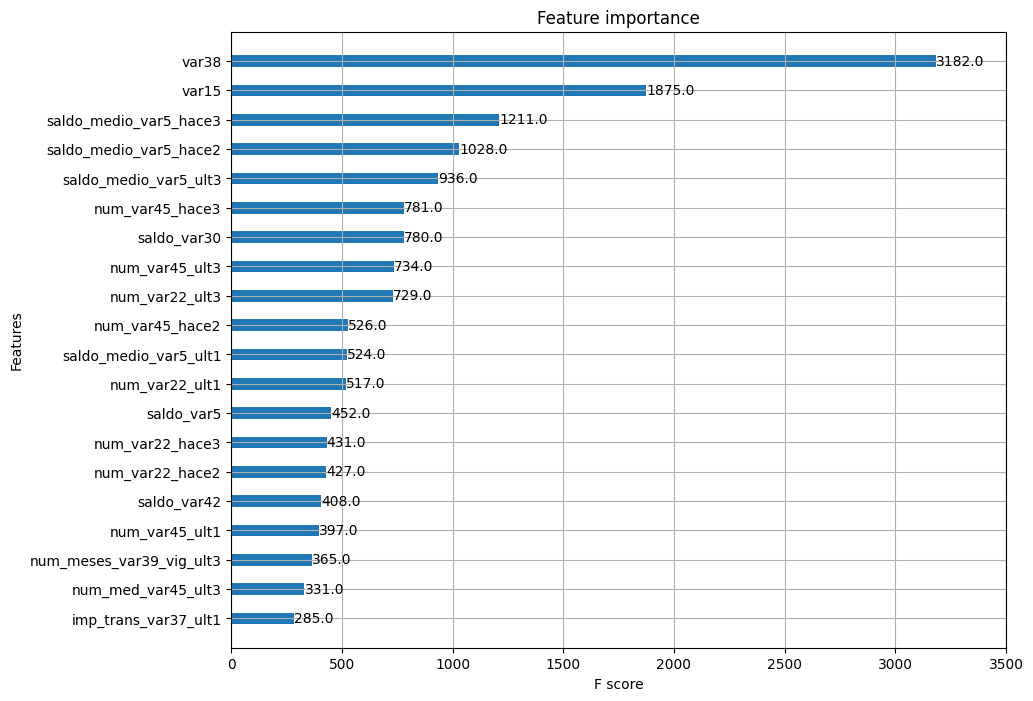

In [28]:
#튜닝된 모델에서 각 피처의 중요도를 피처 중요도 그래포로 나타냄

from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

#성능에 중요한 피처: var38, var15

In [35]:
#LightGBM 모델 학습과 하이퍼 파라미터 튜닝: LightGBM으로 학습 수항하고 ROC-AUC로 측정

from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals, verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1], average='macro')
print('ROC-AUC: {0.4f}'.format(lgbm_roc_score))
#수행 결과 ROC AUC 약 0.8396 : LightGBM이 XGBoost보다 학습 걸리는 시간 더 짧아

TypeError: ignored

In [36]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기위해 n_estimators=200 으로 감소
lgbm_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves': [32, 64],
         'max_depth': [128, 160],
         'min_child_samples': [60, 100],
         'subsample': [0.8, 1]}

#cv는 3으로 지정
gridcv = GridSearchCV(lgbm_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:, 1], average='macro')
print('ROC-AUC: {0:.4f}'.format(lgbm_roc_score))

#수행 결과 ROC AUC 약 0.8442%

ValueError: ignored

In [37]:
#해당 하이퍼 파라미터를 lightGBM에 적용후 다시 학습해 ROC-AUC 측정결과 도출
lgbm_clf = LGBMClassifier(n_estimators=1000,max_depth=128, min_child_samples=100, num_leaves=32, subsample=0.8)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals, verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1], average='macro')
print('ROC-AUC: {0:.4f}'.format(lgbm_roc_score))
#수행 결과 ROC AUC 약 0.8442%

TypeError: ignored

## 9. 분류 실습 - 캐글 신용카드 사기 검출

언더 샘플링과 오버 샘플링

- 언더 샘플링: 많은 데이터 세트를 적은 데이터 세트 수준으로 감소시키는 방식

 이렇게 학습을 수행하면 과도하게 정상 레이블로 학습/예측하는 부작용을 개선할 수 있지만, 너무 많은 정상 레이블 데이터를 감소시켜 정상 레이블의 경우 오히려 제대로 된 학습을 할 수 없다는 단점이 있어 잘 적용하지 않음

- 오버 샘플링: 이상 데이터와 같은 적은 데이터 세트를 증식하여 학습을 위한 충분한 데이터를 확보하는 방법\

 동일한 데이터를 단순히 증식하면 과적합이 되기에 원본 데이터의 피처 값들을 아주 약간만 변경하여 증식

 대표적으로 SMOTE(Synthetic Minority Over-sampling Technique) 방법이 있는데, 이는 적은 데이터 세트에 있는 개별 데이터들의 K Nearest Neighbor 를 찾아서 이 데이터와 K개 이웃들의 차이를 일정 값으로 만들어 기존 데이터와 약간 차이가 나는 새로운 데이터를 생성하는 방식

-> SMOTE를 구현하는 패키지: imbalanced-leam

- 데이터 일차 가공 및 모델 학습/예측/평가

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

card_df = pd.read_csv('/creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


- Time 은 데이터 생성 관련한 작업용 속성으로 제거
- V1~V28 은 kaggle 데이터 설명에서 사용자 ID 및 중요한 기능을 보호하기 위한 PCA 차원 감소의 결과 ->피처의 의미를 알 수 없음
- Amount 는 신용카드 트랜잭션의 금액을 의미
- Class 는 0이면 정상, 1이면 사기 트랜잭션

In [43]:
from sklearn.model_selection import train_test_split

# 인자로 입력받은 DataFrame을 복사한 뒤 Time 칼럼만 삭제하고 복사된 DataFrame을 반환

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

In [48]:
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수
def get_train_test_dataset(df=None):
  #인자로 입력된 dataframe의 사전 데이터 가공이 완료된 복사 dataframe 반환
  df_copy = get_preprocessed_df(df)
  # DataFrame의 맨 마지막 칼럼이 레이블, 나머지는 피처들
  X_features = df_copy.iloc[:, :-1]
  y_target = df_copy.iloc[:, -1]
  # train_test_split()으로 학습과 테스트 데이터 분할. stratify = y_target 으로 stratified 기반 분할
  X_train, X_test, y_train, y_test = \
  train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
  # 학습과 테스트 데이터 세트 반환
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

ValueError: ignored

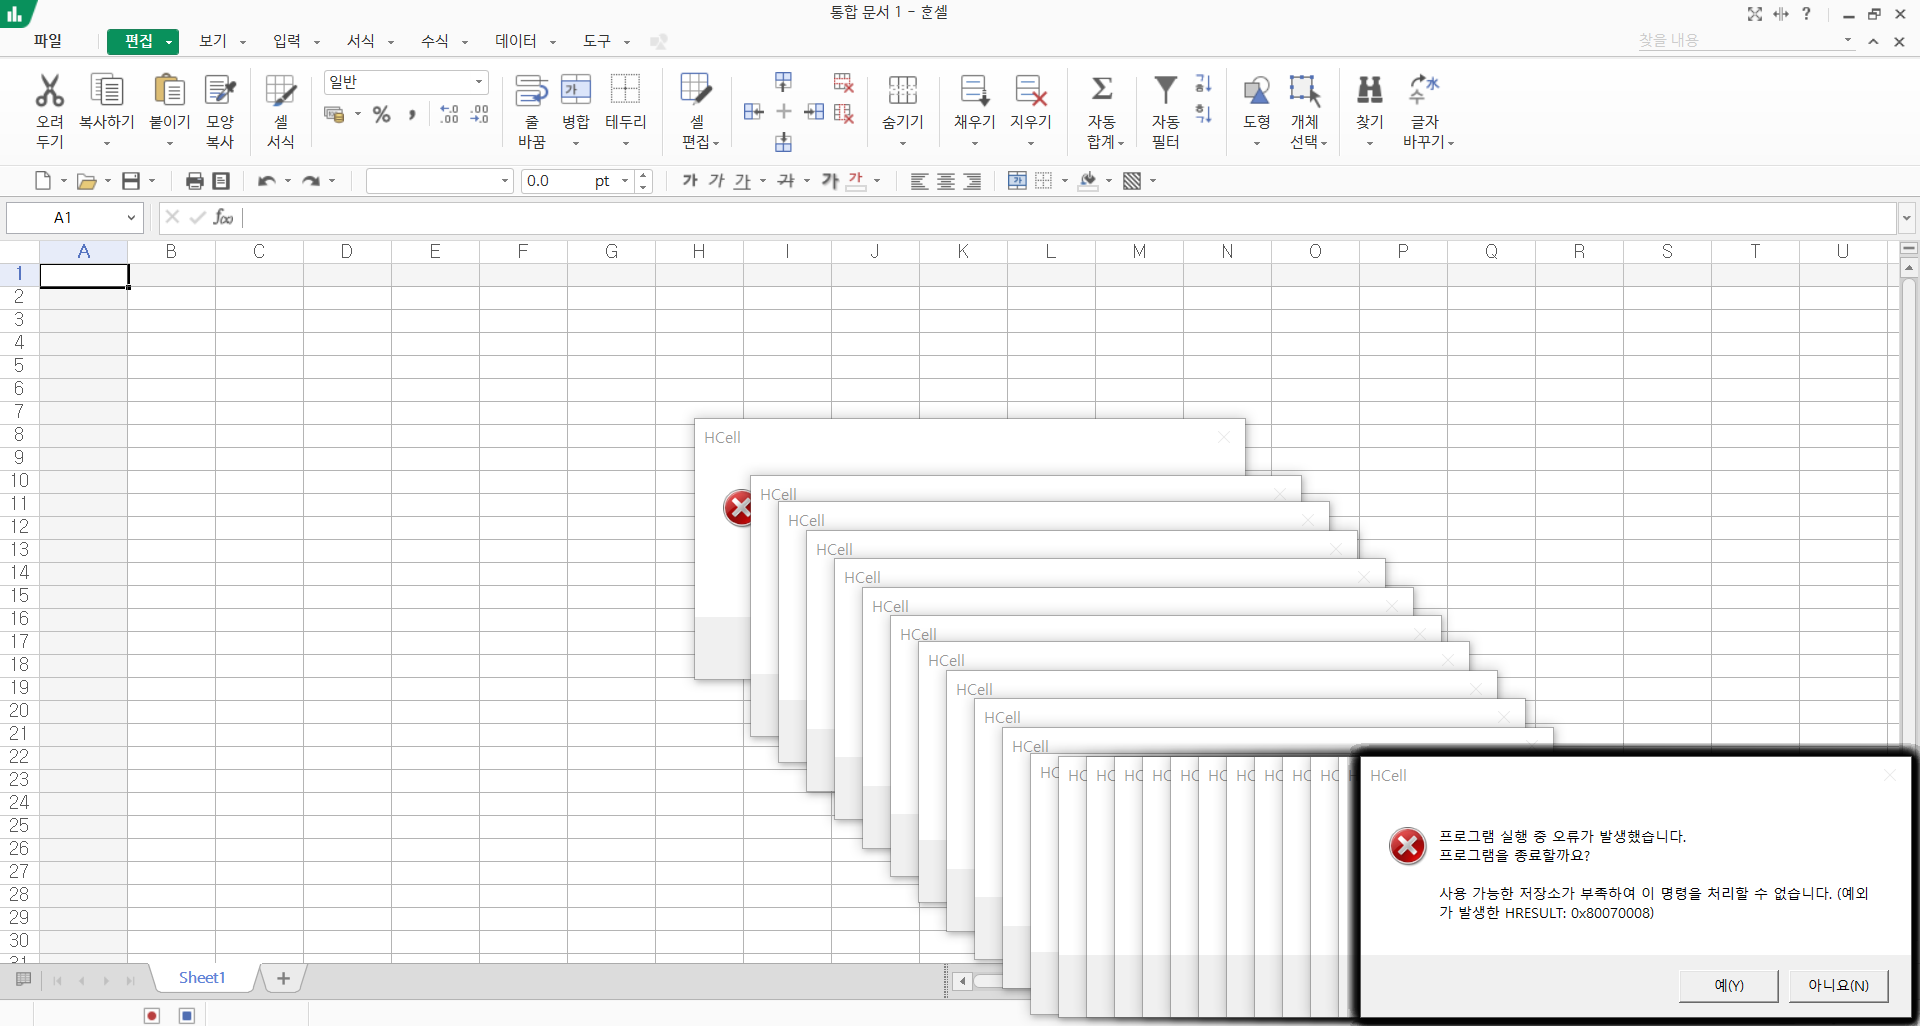

컴퓨터 저장공간 및 뭔가 문제로 엑셀 파일이 안열리고 그 데이터가 잘못 들어와서 NaN을 포함하게 되면서 인식이 안되고 그뒤로 실행이 안되므로 그냥 진행

In [ ]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

In [56]:
#get_clf_eval() 다시 사용하여 예측 성능 평가 진행

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)

    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'
          .format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, lr_pred, lr_pred_proba)

#재현율 0.6081 ROC-AUC 0.9709

In [54]:
#LightGBM 이용한 모델

def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [ ]:
# 불균형한 레이블 값 분포도를 가지므로 LGBMClassifier에서 boost_from_average=False로 설정해야한다.
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

#재현율 0.7568, ROC-AUC 0.9797로 앞의 로지스틱 회귀보다 높은 수치

<Axes: xlabel='Amount', ylabel='Density'>

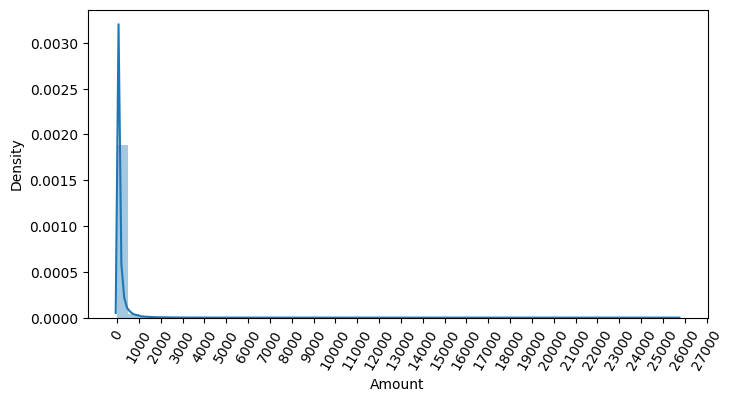

In [50]:
#데이터 분포도 변환 후 모델 학습/예측?평가
#왜곡된 분포도 가지는 데이터 재가공해 모델 다시 테스트

import seaborn as sns

plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.distplot(card_df['Amount'])

In [51]:
# 1,000불 이하의 데이터가 대부분이며, 26,000불까지 꼬리가 긴 형태의 분포 곡선을 가지고 있음
# Amount를 표준 정규분포형태로 변환 후 로지스틱 회귀 예측 성능 측정

from sklearn.preprocessing import StandardScaler
# 사이킷런의 StandardScaler를 이용해 정규 분포 형태로 Amount 피처 값 변환하는 로직으로 수정
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    # 기존 Time, Amount 피처 삭제
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    return df_copy

In [57]:
#amount를 정규 분포 형태로 변환 후 로지스틱 회귀 및 lightgbm 수행
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

from sklearn.linear_model import LogisticRegression
print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('\n### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차행렬
[[85281    14]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8654, 재현율: 0.6081, F1: 0.7143, AUC:0.8040

### LightGBM 예측 성능 ###
[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.039908 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

정규 분포 형태로 Amount 피처값을 변환한 후 적용한 두 모델 모두 이전과 비교해서 성능이 크게 개선되지 않음

이번에는 넘파이의 log1p() 함수를 이용해서 로그 변환을 수행

In [58]:

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    #numpy의 loglp()를 이용해 amount를 로그 변환
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    return df_copy

In [59]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('\n### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차행렬
[[85283    12]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8812, 재현율: 0.6014, F1: 0.7149, AUC:0.8006

### LightGBM 예측 성능 ###
[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.047097 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

이상치 데이터 제거 후 모델 학습/예측/평가

이상치: 전체 데이터의 패턴에서 벗어난 이상 값을 가진 데이터=아웃라이어

이상치 찾는 방법-> IQR 방식(박스플롯으로 시각화 가능): +-1.5*IQR

사분위: 1/4씩으로 구간 분할 -> Q1, Q2, Q3, Q4

IQR=Q3-Q1

<Axes: >

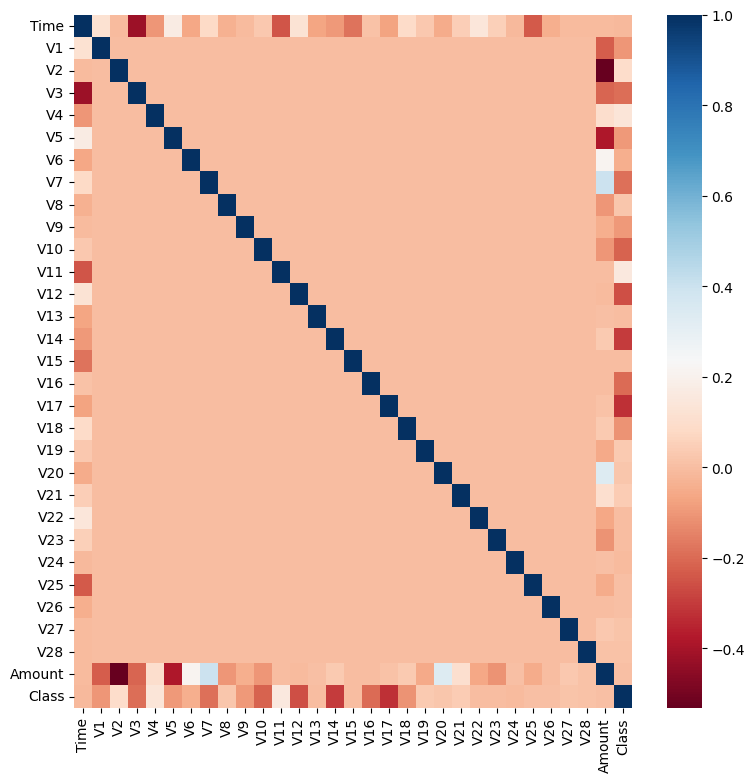

In [60]:
#DATAFRAME의 corr() 이용해 각 피처별 상관도 구한뒤 시본의 heatmap 통해 시각화
import seaborn as sns

plt.figure(figsize=(9,9))
corr=card_df.corr()
sns.heatmap(corr, cmap='RdBu')

cmap ='RdBu'로 설정해 양의 상관관계가 높을수록 색깔이 진한 파란색에 가깝고 음의 상관관계가 높을 수록 색깔이 진한 빨간색에 가깝게 표현

-> IQR 이용해 이상치 검출 함수 생성후 검출된 이상치 삭제

In [61]:
import numpy as np
def get_outlier(df=None, column=None, weight=1.5):
    # fraud 에 해당하는 column데이터만 추출, 1/4분위와 3/4분위지점을 np.percentile로 구함
    fraud = df[df['Class'] == 1][column]
    q25 = np.percentile(fraud.values, 25)
    q75 = np.percentile(fraud.values, 75)
    #iqr을 구하고, iqr에 1.5를 곱해 최댓값과 최솟값 지점 구함
    iqr = q75 - q25
    iqr_weight = iqr * weight
    low_val = q25 - iqr_weight
    high_val = q75 + iqr_weight
    #최댓값보다 크거나, 최솟값보다 작은 값을 이상치 데이터로 설정하고 dataframe index 반환
    outlier_index = fraud[(fraud < low_val) | (fraud > high_val)].index
    return outlier_index

In [62]:
#get_outlier() 함수 이용해 v14 칼럼에서 이상치 데이터 찾기
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print(f'이상치 데이터 인덱스: {outlier_index}')

이상치 데이터 인덱스: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [63]:
# 8296, 8615, 9035, 9252 번 Index가 이상치로 추출되었다. 이상치를 추출하고 삭제하는 로직을 get_processed_df() 함수에 추가해 다시 적용

#get_preprocessed_df()를 로그 변환 후 v14피처의 이상치 데이터를 삭제하는 로직으로 변경
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    #이상치 데이터 삭제하는 로직 추가
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('\n### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차행렬
[[85281    14]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8750, 재현율: 0.6712, F1: 0.7597, AUC:0.8355

### LightGBM 예측 성능 ###
[LightGBM] [Info] Number of positive: 342, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.040449 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199362, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

이상치 제거 후 로지스틱 회귀의 경우 재현율이 0.6014 에서 0.6712 로, LightGBM의 경우 0.7635 에서 0.8288 로 크게 증가

-SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가

SMOTE 를 적용할 때 반드시 학습 데이터 세트에만 오버 샘플링해야한다. 오버 샘플링은 fit_sample() 메서드를 사용

In [64]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ',X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ',X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: ',pd.Series(y_train_over).value_counts())

AttributeError: ignored

SMOTE 적용 전 199362건이 적용 후 2배에 가까운 398040건으로 늘어났고, 레이블 값이 0과 1의 분포가 동일하게 199020개로 생성됨

생성된 학습 데이터 세트 기반 로지스틱 회귀 모델 학습 후 성능 평가

In [ ]:
lr_clf = LogisticRegression()
# ftr_train 과 tgt_train 인자 값이 SMOTE 증식된 X_train_over 와 y_train_over로 변경됨에 유의
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

로지스틱 회귀는 SMOTE 적용 후 재현율이 0.6712 에서 0.9247 로 크게 증가하지만 정밀도가 0.8750 에서 0.0542 로 감소
-> 문제를 임곗값에 따른 정밀도와 재현율 곡선으로 알아보기

In [65]:
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()

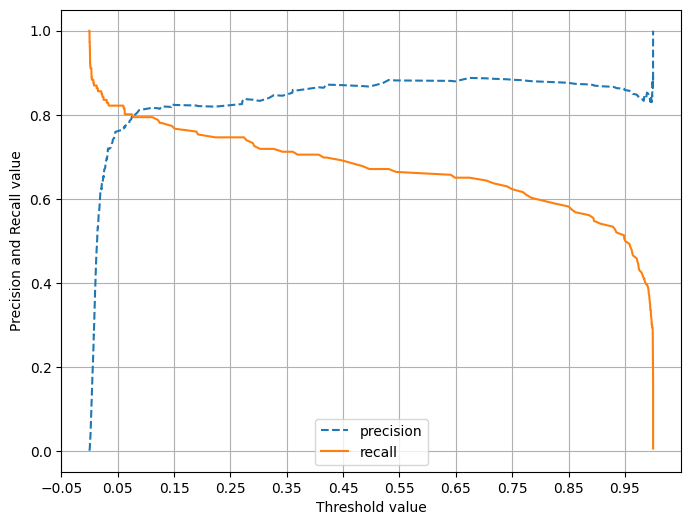

In [66]:
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])
#분류 결정 임계값을 조정하더라도 임계값의 민감도가 너무 심해 올바른 재현율/정밀도 성능 얻을 수 없음
#-> LIGHTGBM 모델을 SMOTE로 오버 샘플링 된 데이터 세트로 학습/예측/평가 수행해보기

In [67]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)
#이상치만 제거한 경우와 비교해 재현율이 0.8288 에서 0.8493 으로 높아졌고, 정밀도는 0.9603 에서 0.9118 로 낮아졌다
#좋은 SMOTE 패키지일수록 재현율 증가율은 높이고 정밀도 감소율은 낮출수있도록 효과적으로 데이터를 증식함

NameError: ignored